## 目的：
- 1.EDA价值主要在于熟悉了解整个数据集的基本情况（缺失值，异常值），对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.

- 2.了解变量间的相互关系、变量与预测值之间的存在关系。

- 3.为特征工程做准备

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/FinancialRiskControl

比赛地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction

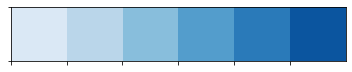

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
sns.palplot(sns.color_palette("Blues"))
sns.set_style('whitegrid')
sns.set(font_scale=2)

In [2]:
# 导入数据
train = pd.read_csv('e:/data/tianchi_rc/train.csv', index_col='id')
test = pd.read_csv('e:/data/tianchi_rc/testA.csv', index_col='id')

### 目标变量的分布

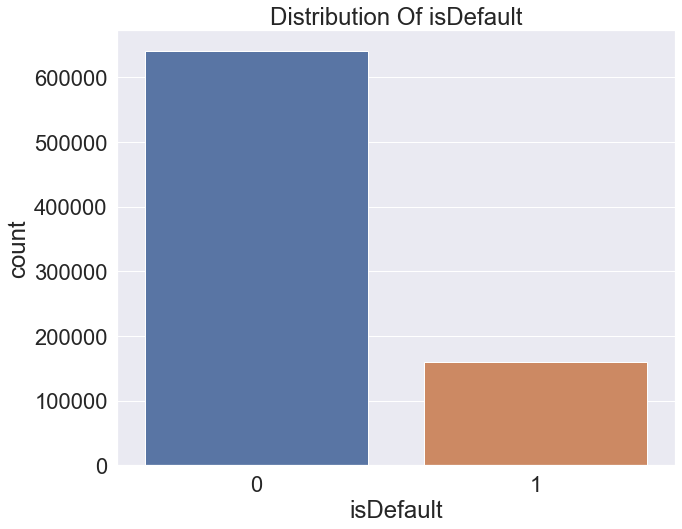

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(train['isDefault'])
plt.title('Distribution Of isDefault')
plt.show()

In [4]:
train['isDefault'].mean()

0.1995125

### 基础概况

- id	为贷款清单分配的唯一信用证标识
- loanAmnt	贷款金额
- term	贷款期限（year）
- interestRate	贷款利率
- installment	分期付款金额
- grade	贷款等级
- subGrade	贷款等级之子级
- employmentTitle	就业职称
- employmentLength	就业年限（年）
- homeOwnership	借款人在登记时提供的房屋所有权状况
- annualIncome	年收入
- verificationStatus	验证状态
- issueDate	贷款发放的月份
- purpose	借款人在贷款申请时的贷款用途类别
- postCode	借款人在贷款申请中提供的邮政编码的前3位数字
- regionCode	地区编码
- dti	债务收入比
- delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
- ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
- ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
- openAcc	借款人信用档案中未结信用额度的数量
- pubRec	贬损公共记录的数量
- pubRecBankruptcies	公开记录清除的数量
- revolBal	信贷周转余额合计
- revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
- totalAcc	借款人信用档案中当前的信用额度总数
- initialListStatus	贷款的初始列表状态
- applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
- earliesCreditLine	借款人最早报告的信用额度开立的月份
- title	借款人提供的贷款名称
- policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
- n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            799999 non-null  float64
 15  regionCode          800000 non-nul

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 800000 to 999999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            200000 non-null  float64
 1   term                200000 non-null  int64  
 2   interestRate        200000 non-null  float64
 3   installment         200000 non-null  float64
 4   grade               200000 non-null  object 
 5   subGrade            200000 non-null  object 
 6   employmentTitle     200000 non-null  float64
 7   employmentLength    188258 non-null  object 
 8   homeOwnership       200000 non-null  int64  
 9   annualIncome        200000 non-null  float64
 10  verificationStatus  200000 non-null  int64  
 11  issueDate           200000 non-null  object 
 12  purpose             200000 non-null  int64  
 13  postCode            200000 non-null  float64
 14  regionCode          200000 non-null  int64  
 15  dti                 199939 no

### Nunique值

In [7]:
train.nunique()

loanAmnt                1540
term                       2
interestRate             641
installment            72360
grade                      7
subGrade                  35
employmentTitle       248683
employmentLength          11
homeOwnership              6
annualIncome           44926
verificationStatus         3
issueDate                139
isDefault                  2
purpose                   14
postCode                 932
regionCode                51
dti                     6321
delinquency_2years        30
ficoRangeLow              39
ficoRangeHigh             39
openAcc                   75
pubRec                    32
pubRecBankruptcies        11
revolBal               71116
revolUtil               1286
totalAcc                 134
initialListStatus          2
applicationType            2
earliesCreditLine        720
title                  39644
policyCode                 1
n0                        39
n1                        33
n2                        50
n3            

In [8]:
test.nunique()

loanAmnt               1444
term                      2
interestRate            597
installment           41575
grade                     7
subGrade                 35
employmentTitle       79282
employmentLength         11
homeOwnership             6
annualIncome          15530
verificationStatus        3
issueDate               138
purpose                  14
postCode                889
regionCode               51
dti                    4816
delinquency_2years       23
ficoRangeLow             39
ficoRangeHigh            39
openAcc                  66
pubRec                   22
pubRecBankruptcies       10
revolBal              46395
revolUtil              1145
totalAcc                113
initialListStatus         2
applicationType           2
earliesCreditLine       668
title                 12058
policyCode                1
n0                       30
n1                       28
n2                       42
n3                       42
n4                       45
n5                  

### 训练集和测试集的分布

In [9]:
for i in test.columns:
    trn_ = set(train[i].unique())
    tst_ = set(test[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

loanAmnt 1540 1444 0.9930747922437673
term 2 2 1.0
interestRate 641 597 0.9899497487437185
installment 72360 41575 0.885219482862297
grade 7 7 1.0
subGrade 35 35 1.0
employmentTitle 248684 79282 0.37668070936656495
employmentLength 12 12 1.0
homeOwnership 6 6 1.0
annualIncome 44926 15530 0.5126851255634256
verificationStatus 3 3 1.0
issueDate 139 138 1.0
purpose 14 14 1.0
postCode 933 889 0.9966254218222722
regionCode 51 51 1.0
dti 6322 4817 0.940004151961802
delinquency_2years 30 23 0.9565217391304348
ficoRangeLow 39 39 0.9743589743589743
ficoRangeHigh 39 39 0.9743589743589743
openAcc 75 66 0.9242424242424242
pubRec 32 22 0.8181818181818182
pubRecBankruptcies 12 11 0.8181818181818182
revolBal 71116 46395 0.8901605776484535
revolUtil 1287 1146 0.9633507853403142
totalAcc 134 113 0.9823008849557522
initialListStatus 2 2 1.0
applicationType 2 2 1.0
earliesCreditLine 720 668 0.9910179640718563
title 39645 12058 0.31506054071985407
policyCode 1 1 1.0
n0 40 31 0.967741935483871
n1 34 29 0.9

In [10]:
train.columns

Index(['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'], dtype='object')

In [11]:
for data in [train, test]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    #构造时间特征
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [12]:
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [train, test]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [13]:
for data in [train, test]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

### 连续变量分析

In [14]:
cat_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership',
'verificationStatus', 'purpose', 'postCode', 'regionCode', 
'applicationType', 'initialListStatus', 'title', 'policyCode','issueDate']

In [15]:
con_features=[f for f in test.columns if f not in cat_features]

In [16]:
con_features

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentLength',
 'annualIncome',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'earliesCreditLine',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'issueDateDT']

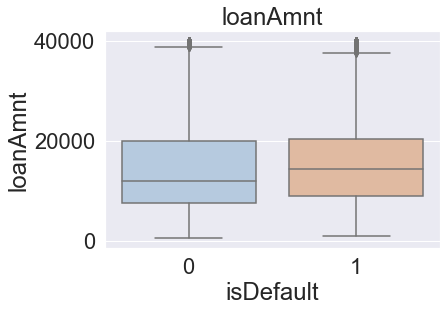

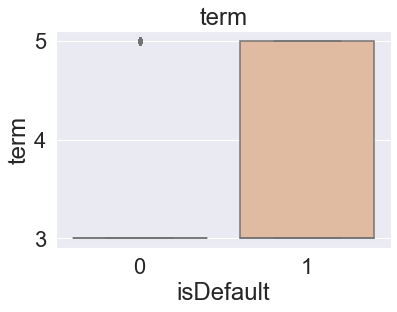

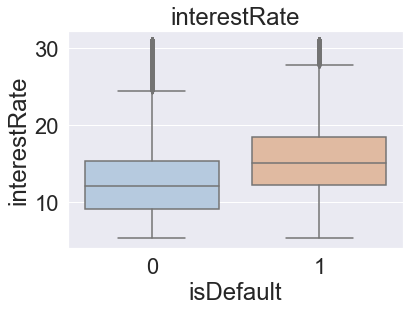

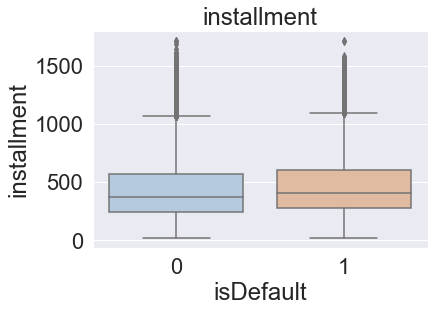

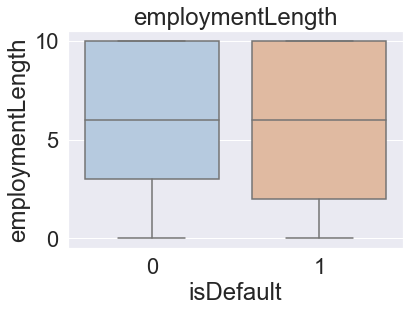

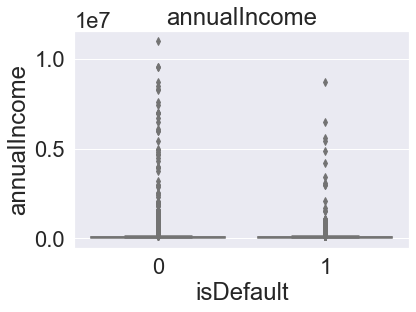

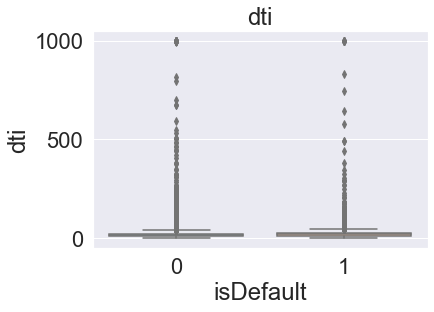

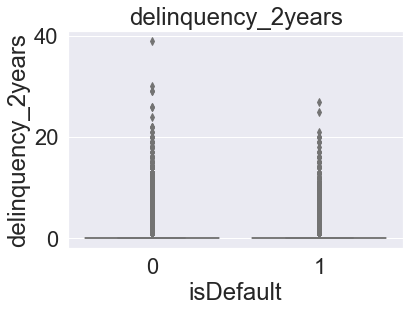

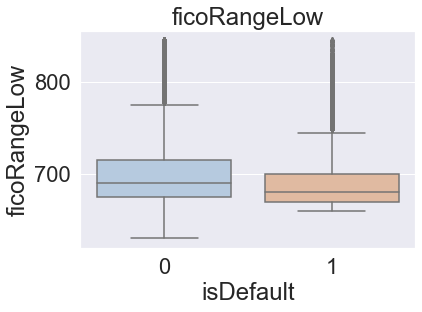

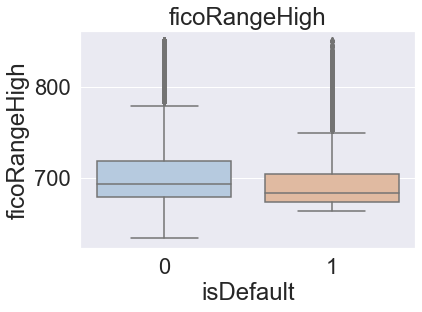

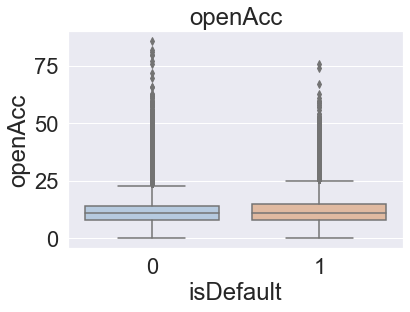

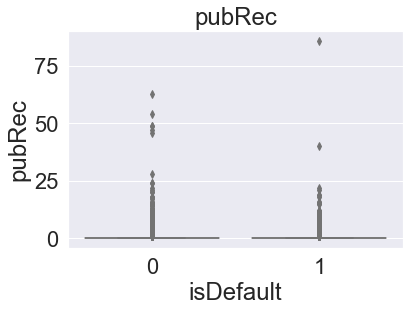

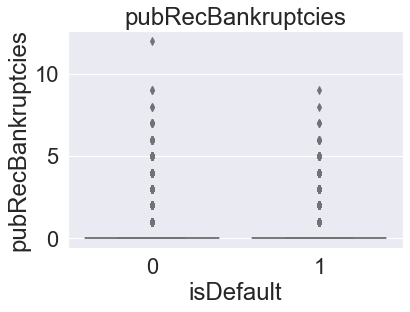

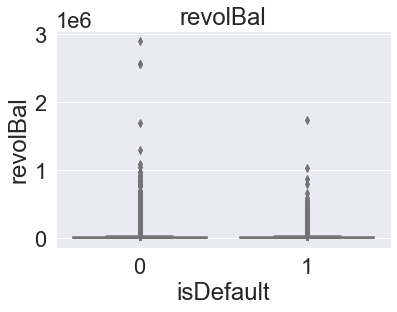

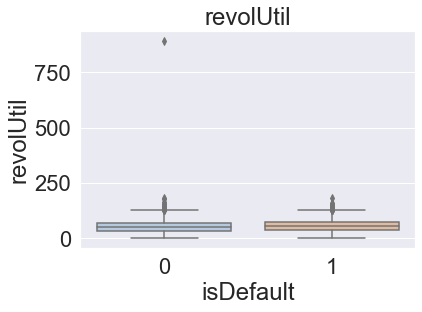

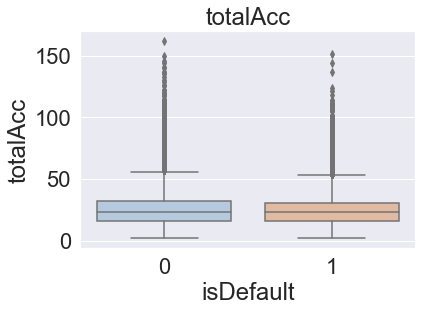

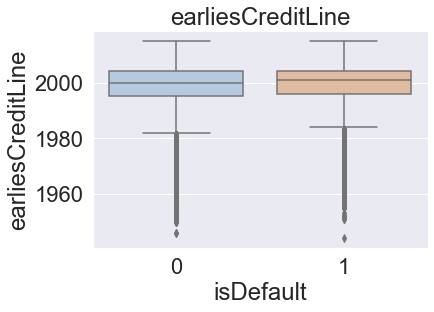

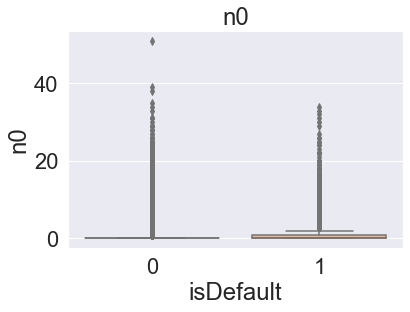

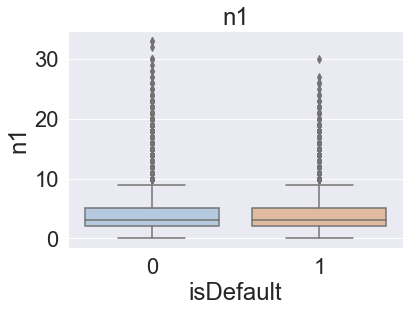

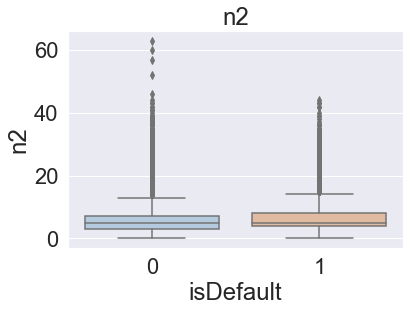

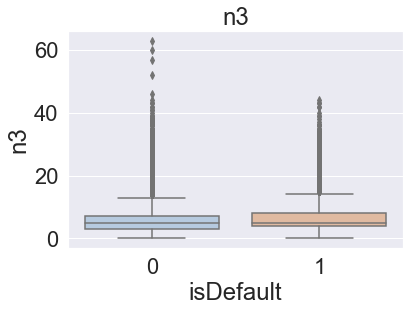

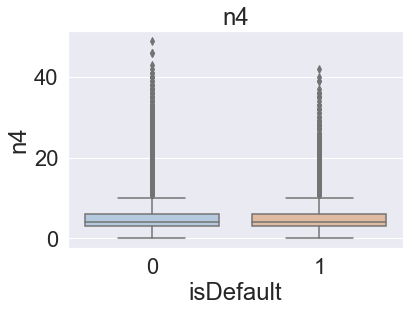

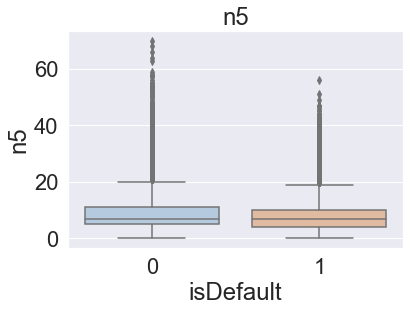

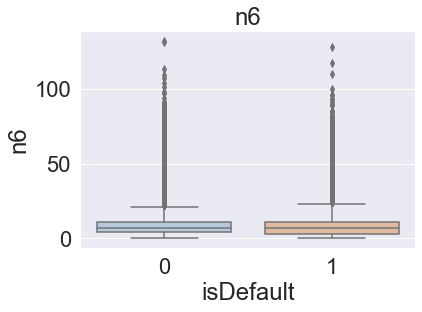

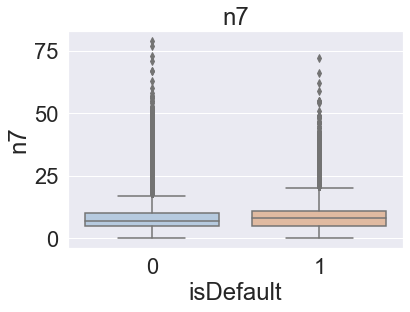

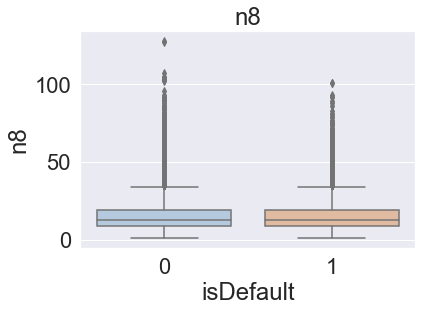

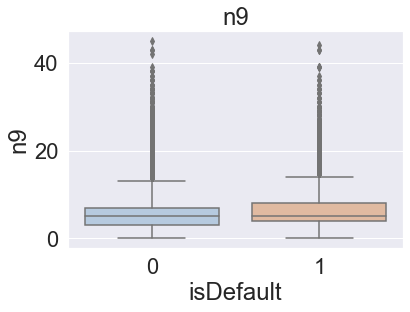

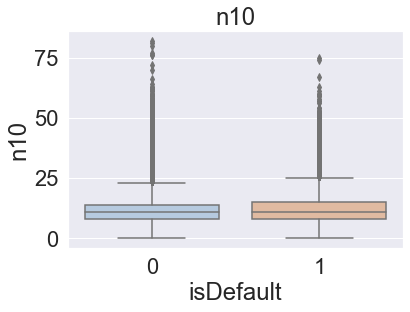

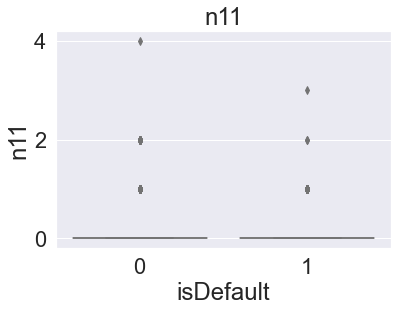

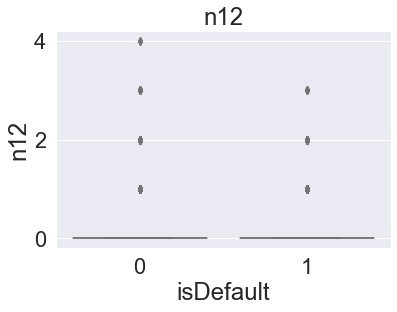

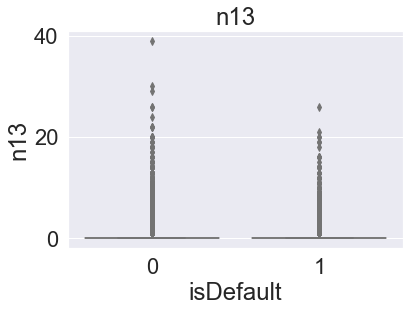

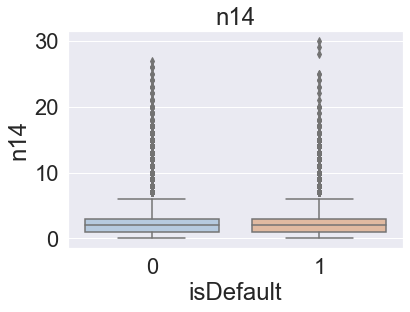

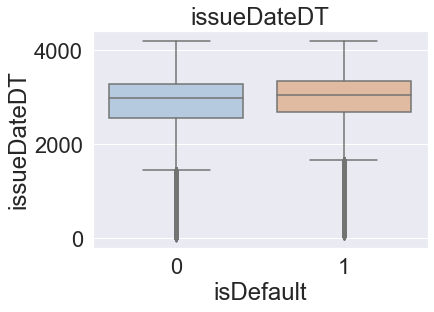

In [17]:
for col in con_features:
    sns.boxplot(x='isDefault', y=col, saturation=0.5,palette='pastel', data=train)
    plt.title(col)
    plt.show()

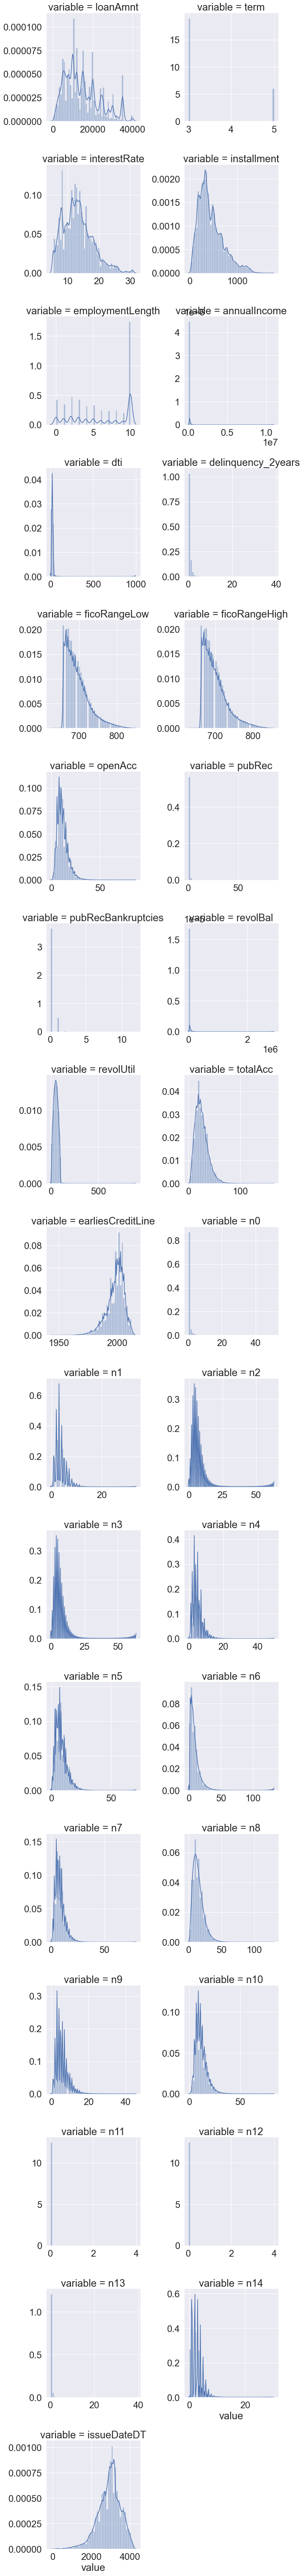

In [25]:
#每个数字特征得分布可视化
f = pd.melt(train, value_vars=con_features)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False,height=5)
g = g.map(sns.distplot, "value")

### 单变量分析

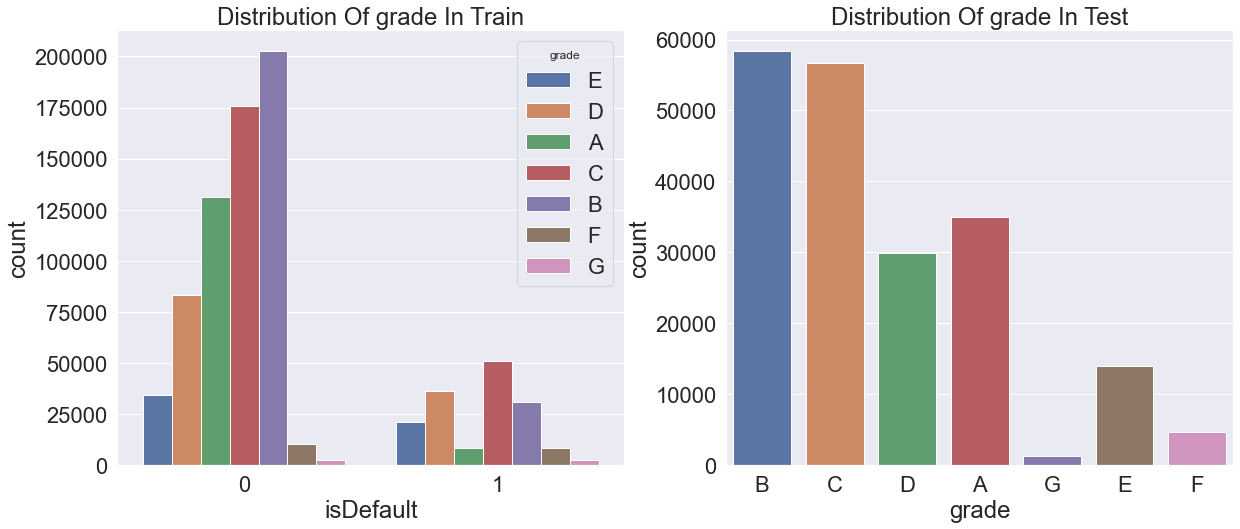

In [21]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.countplot(x='isDefault', hue='grade', data=train)
plt.title('Distribution Of grade In Train')
plt.subplot(1,2,2)
sns.countplot(x='grade', data=test)
plt.title('Distribution Of grade In Test')
plt.show()

In [23]:
subGrade分布=train.groupby('subGrade',as_index=False)['isDefault'].agg({'逾期' : 'sum','总数' : 'count'})
subGrade分布['subGrade逾期比']=subGrade分布['逾期']/subGrade分布['总数']
subGrade分布

,subGrade,逾期,总数,subGrade逾期比
0,A1,827,25909,0.031919
1,A2,1011,22124,0.045697
2,A3,1266,22655,0.055882
3,A4,2079,30928,0.067221
4,A5,3249,38045,0.085399
5,B1,4362,42382,0.102921
6,B2,4965,44227,0.112262
7,B3,6281,48600,0.129239
8,B4,7360,49516,0.148639
9,B5,8111,48965,0.165649
